In [1]:
import torch
from torch import nn
import torch.nn.functional as F

from matplotlib import pyplot as plt
import numpy as np


import helper

In [2]:
def activation(x):
    """
        x: torch.Tensor
    """

    return 1/(1+torch.exp(-x))

In [3]:
### Generate some data
torch.manual_seed(7) # Set the random seed so things are predictable

# Features are 3 random normal variables
features = torch.randn((1, 5))
# True weights for our data, random normal variables again
weights = torch.randn_like(features)
# and a true bias term
bias = torch.randn((1, 1))

### Exercise: Calculate the output of the network with input features features, weights weights, and bias bias. Similar to Numpy, PyTorch has a torch.sum() function, as well as a .sum() method on tensors, for taking sums. Use the function activation defined above as the activation function

In [4]:
activation(torch.sum(features*weights)+bias)

tensor([[0.1595]])

In [5]:
weights1 = weights.view(5,1)

In [6]:
inner  = torch.mm(features, weights1)

In [7]:
activation(inner+bias)

tensor([[0.1595]])

In [8]:
### Generate some data
torch.manual_seed(7) # Set the random seed so things are predictable

# Features are 3 random normal variables
features = torch.randn((1, 3))

# Define the size of each layer in our network
n_input = features.shape[1]     # Number of input units, must match number of input features
n_hidden = 2                    # Number of hidden units 
n_output = 1                    # Number of output units

# Weights for inputs to hidden layer
W1 = torch.randn(n_input, n_hidden)
# Weights for hidden layer to output layer
W2 = torch.randn(n_hidden, n_output)

# and bias terms for hidden and output layers
B1 = torch.randn((1, n_hidden))
B2 = torch.randn((1, n_output))

In [9]:
features

tensor([[-0.1468,  0.7861,  0.9468]])

In [10]:
features.shape, W1.shape, B1.shape, W2.shape

(torch.Size([1, 3]),
 torch.Size([3, 2]),
 torch.Size([1, 2]),
 torch.Size([2, 1]))

### Exercise: Calculate the output of our little network using matrix multiplication.

In [11]:
activation(torch.mm(activation(torch.mm(features, W1)+B1), W2)+B2)

tensor([[0.3171]])

In [12]:
#Numpy to Torch and back

import numpy as np
a = np.random.rand(4,3)

b = torch.from_numpy(a)
b
#The memory is shared between the Numpy array and Torch tensor, so if you change the values in-place of one object, the other will change as well.

tensor([[0.9685, 0.3862, 0.5896],
        [0.7640, 0.4622, 0.0480],
        [0.7758, 0.6898, 0.6125],
        [0.9667, 0.8099, 0.7890]], dtype=torch.float64)

In [13]:
from six.moves import urllib

opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
urllib.request.install_opener(opener)

In [14]:
### Run this cell

from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [15]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


In [16]:
n_input = 784  # Number of input units, must match number of input features
n_hidden = 256                    # Number of hidden units 
n_output = 10

W1 = torch.randn(n_input, n_hidden)
W2 = torch.randn(n_hidden, n_output)

B1 = torch.randn((1, n_hidden))
B2 = torch.randn((1, n_output))

### Exercise: Calculate the output for this multi-layer network using the weights W1 & W2, and the biases, B1 & B2.

In [17]:
inputs = images.reshape(64,-1)

In [18]:
h = activation(torch.mm(inputs, W1)+B1)
out = (torch.mm(h, W2)+B2)

#### Exercise: Implement a function softmax that performs the softmax calculation and returns probability distributions for each example in the batch. Note that you'll need to pay attention to the shapes when doing this. If you have a tensor a with shape (64, 10) and a tensor b with shape (64,), doing a/b will give you an error because PyTorch will try to do the division across the columns (called broadcasting) but you'll get a size mismatch. The way to think about this is for each of the 64 examples, you only want to divide by one value, the sum in the denominator. So you need b to have a shape of (64, 1). This way PyTorch will divide the 10 values in each row of a by the one value in each row of b. Pay attention to how you take the sum as well. You'll need to define the dim keyword in torch.sum. Setting dim=0 takes the sum across the rows while dim=1 takes the sum across the columns.

In [19]:
def softmax(x):
    proba = torch.exp(x)/torch.sum(torch.exp(x), dim=1).reshape(-1,1)
    return proba

In [20]:
results_batch = softmax(out)

In [21]:
results_batch.shape

torch.Size([64, 10])

### Exercise: Create a network with 784 input units, a hidden layer with 128 units and a ReLU activation, then a hidden layer with 64 units and a ReLU activation, and finally an output layer with a softmax activation as shown above. You can use a ReLU activation with the nn.ReLU module or F.relu function.

In [22]:
#Building a NN

class NeuralNet(torch.nn.Module):
    
    def __init__(self):
        super().__init__()
        
        self.fc1 = nn.Linear(784,128)
        self.fc2 = nn.Linear(128,64)
        self.fc3 = nn.Linear(64,10)
        
        
    def forward(self, x):
        
        x = self.fc1(x)
        F.relu_(x)
        
        x = self.fc2(x)
        F.relu_(x)
        
        x = self.fc3(x)
        x = F.softmax(x, dim=1)
    

In [23]:
model = NeuralNet()

In [24]:
model.fc1.bias

Parameter containing:
tensor([ 0.0020,  0.0088, -0.0289,  0.0308,  0.0061, -0.0162,  0.0313,  0.0208,
         0.0323, -0.0276, -0.0059, -0.0044,  0.0304, -0.0246,  0.0104,  0.0065,
         0.0301,  0.0106, -0.0293, -0.0130, -0.0125,  0.0344,  0.0063,  0.0027,
        -0.0290, -0.0088,  0.0100,  0.0220,  0.0140, -0.0021, -0.0099, -0.0019,
        -0.0085,  0.0056,  0.0130, -0.0014, -0.0033,  0.0240,  0.0133, -0.0035,
         0.0331,  0.0079, -0.0302,  0.0092,  0.0003, -0.0261,  0.0026,  0.0224,
         0.0279,  0.0009, -0.0170, -0.0029,  0.0061,  0.0346, -0.0096,  0.0117,
        -0.0053, -0.0162,  0.0148,  0.0297, -0.0034, -0.0155, -0.0254,  0.0152,
        -0.0189,  0.0064,  0.0296, -0.0209,  0.0226, -0.0183,  0.0039,  0.0233,
         0.0065, -0.0059, -0.0104,  0.0311, -0.0313,  0.0212, -0.0066,  0.0267,
         0.0344, -0.0159,  0.0112,  0.0274,  0.0094, -0.0046,  0.0184,  0.0238,
         0.0060, -0.0144,  0.0214,  0.0037, -0.0174,  0.0211,  0.0266, -0.0325,
        -0.0193,  

In [25]:
model.fc1.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [26]:
model.fc1.weight.data.normal_(std=0.01)

tensor([[-0.0015, -0.0082,  0.0019,  ..., -0.0056,  0.0065,  0.0006],
        [-0.0025, -0.0009,  0.0168,  ...,  0.0090,  0.0057,  0.0020],
        [-0.0038, -0.0063,  0.0171,  ..., -0.0149,  0.0168,  0.0037],
        ...,
        [ 0.0060, -0.0162,  0.0037,  ..., -0.0004, -0.0097, -0.0087],
        [ 0.0021, -0.0020, -0.0031,  ..., -0.0080,  0.0098, -0.0050],
        [ 0.0138, -0.0074,  0.0163,  ...,  0.0021, -0.0081, -0.0025]])

In [27]:
# Grab some data 
dataiter = iter(trainloader)
images, labels = dataiter.next()

In [28]:
# Resize images into a 1D vector, new shape is (batch size, color channels, image pixels) 
images.resize_(64, 1, 784)
# or images.resize_(images.shape[0], 1, 784) to automatically get batch size

tensor([[[-1., -1., -1.,  ..., -1., -1., -1.]],

        [[-1., -1., -1.,  ..., -1., -1., -1.]],

        [[-1., -1., -1.,  ..., -1., -1., -1.]],

        ...,

        [[-1., -1., -1.,  ..., -1., -1., -1.]],

        [[-1., -1., -1.,  ..., -1., -1., -1.]],

        [[-1., -1., -1.,  ..., -1., -1., -1.]]])

In [29]:
# Forward pass through the network
img_idx = 0
ps = model.forward(images[img_idx,:])

img = images[img_idx]
#helper.view_classify(img.view(1, 28, 28), ps)

In [30]:
img

tensor([[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -

In [31]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      F.log_softmax(10,))

# Define the loss
criterion = nn.CrossEntropyLoss()

# Get our data
dataiter = iter(trainloader)

images, labels = next(dataiter)

# Flatten images
images = images.view(images.shape[0], -1)

# Forward pass, get our logits
logits = model(images)
# Calculate the loss with the logits and the labels
loss = criterion(logits, labels)

print(loss)

AttributeError: 'int' object has no attribute 'dim'

## Exercise: Build a model that returns the log-softmax as the output and calculate the loss using the negative log likelihood loss. Note that for nn.LogSoftmax and F.log_softmax you'll need to set the dim keyword argument appropriately. dim=0 calculates softmax across the rows, so each column sums to 1, while dim=1 calculates across the columns so each row sums to 1. Think about what you want the output to be and choose dim appropriately.

In [ ]:
# TODO: Build a feed-forward network
model = nn.Sequential(nn.Linear(784,128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64,10),
                      nn.LogSoftmax(dim=1))

# TODO: Define the loss
criterion = nn.NLLLoss()

### Run this to check your work
# Get our data
dataiter = iter(trainloader)

images, labels = next(dataiter)

# Flatten images
images = images.view(images.shape[0], -1)

# Forward pass, get our logits
logps = model(images)
# Calculate the loss with the logits and the labels
loss = criterion(logps, labels)

print(loss)

In [32]:
from torch import optim
optimizer = optim.SGD(model.parameters(), lr=0.01)


## Exercise: Implement the training pass for our network. If you implemented it correctly, you should see the training loss drop with each epoch.

In [33]:
model.parameters()

<generator object Module.parameters at 0x7f728478aba0>

In [34]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        optimizer.zero_grad()
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # TODO: Training pass
        output = model(images)        
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.9546953221119798
Training loss: 0.8970477165761532
Training loss: 0.5417207487102257
Training loss: 0.44127489353166716
Training loss: 0.39231130943846093


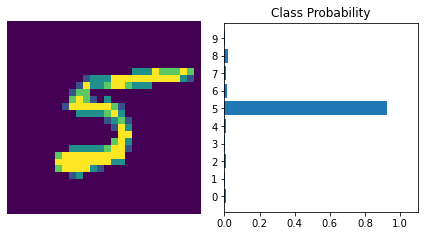

In [55]:
%matplotlib inline
import helper

dataiter = iter(trainloader)
images, labels = next(dataiter)

img = images[12].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
helper.view_classify(img.view(1, 28, 28), ps)